<a href="https://colab.research.google.com/github/raviakasapu/LLM-Training-Docs/blob/main/Sentence_Transformers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Sentence Transformers SBERT
https://sbert.net/index.html

sentence transformer models are bi-encoder models.

### Useful functions

*   `SentenceTransformer` --> main package for using models
*   `SentenceTransformer.encode` --> encode the sentences to get embeddings
*   `SentenceTransformer.similaity` --> calculate similarity between sentences

## Why
*   Embeddings for RAG (sentence transformers models)
*   Calculate similarity scores ( cross encoder models

Examples include

*   Semantic Search
*   textual semantic similarity
*   paraphrase mining


## using a sentence transformer model

In [1]:
from sentence_transformers import SentenceTransformer


[`all-MiniLM-L6-v2`](https://huggingface.co/sentence-transformers/all-MiniLM-L6-v2) is a popular embeddinng model used in RAG and other simple usecase. the Model maps sentences and paragraphs in 384 dimensions of embedding vector space

Typical use cases are
*  Information retrieval
*  clustering
*  Semantic textual similarity
*  semantic search

Note: default input length 256 words

### Input length

general input sequence length is 512 tokens for transformer models like BERT, RoBERTa, DistilBERT, or around 300 words approximately
we can control the input sequence length using `model.max_seq_length`

### parmeters

*   prompts : provides additional context for the model on the task, ex: classification, retrieval, clustering
*   default_prompt_name : default prompt to be used
*   similarity_fn_name : provides similarity metri or funtion to be used
    - SimilarityFunction.COSINE (a.k.a “cosine”): Cosine Similarity (default)
    - SimilarityFunction.DOT_PRODUCT (a.k.a “dot”): Dot Product
    - SimilarityFunction.EUCLIDEAN (a.k.a “euclidean”): Negative Euclidean Distance
    - SimilarityFunction.MANHATTAN (a.k.a. “manhattan”): Negative Manhattan Distance



In [2]:
model = SentenceTransformer('all-MiniLM-L6-v2')


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.7k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

1_Pooling%2Fconfig.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

lets define few exmaple sentences and calculate the embeddings using encode function

In [3]:
sentences = [
    "The weather is lovely today.",
    "It's so sunny outside!",
    "He drove to the stadium.",
]

In [4]:
embeddings = model.encode(sentences)
print(embeddings.shape)

(3, 384)


In [9]:
new_sentence = "it is raining today"
new_embedding = model.encode(new_sentence)
print(new_embedding.shape)

(384,)


## finding similarity

the new sentence will calcuclate the similarity score for each of the sentene in the embedding.

In [10]:
model.similarity(new_embedding,embeddings)

tensor([[0.6291, 0.4759, 0.1300]])

by looking at the scores, 0.4759, `it's so sunny outside` has more similarity with `raining today`

In [11]:
"""
This is a simple application for sentence embeddings: semantic search

We have a corpus with various sentences. Then, for a given query sentence,
we want to find the most similar sentence in this corpus.

This script outputs for various queries the top 5 most similar sentences in the corpus.
"""

import torch

from sentence_transformers import SentenceTransformer

embedder = SentenceTransformer("all-MiniLM-L6-v2")

# Corpus with example sentences
corpus = [
    "A man is eating food.",
    "A man is eating a piece of bread.",
    "The girl is carrying a baby.",
    "A man is riding a horse.",
    "A woman is playing violin.",
    "Two men pushed carts through the woods.",
    "A man is riding a white horse on an enclosed ground.",
    "A monkey is playing drums.",
    "A cheetah is running behind its prey.",
]
# Use "convert_to_tensor=True" to keep the tensors on GPU (if available)
corpus_embeddings = embedder.encode(corpus, convert_to_tensor=True)

# Query sentences:
queries = [
    "A man is eating pasta.",
    "Someone in a gorilla costume is playing a set of drums.",
    "A cheetah chases prey on across a field.",
]


In [14]:

top_k = min(1, len(corpus))
for query in queries:
    query_embedding = embedder.encode(query, convert_to_tensor=True)

    # We use cosine-similarity and torch.topk to find the highest 5 scores
    similarity_scores = embedder.similarity(query_embedding, corpus_embeddings)[0]
    scores, indices = torch.topk(similarity_scores, k=top_k)

    print("\nQuery:", query)
    print("Top 5 most similar sentences in corpus:")

    for score, idx in zip(scores, indices):
        print(corpus[idx], f"(Score: {score:.4f})")


Query: A man is eating pasta.
Top 5 most similar sentences in corpus:
A man is eating food. (Score: 0.7035)

Query: Someone in a gorilla costume is playing a set of drums.
Top 5 most similar sentences in corpus:
A monkey is playing drums. (Score: 0.6433)

Query: A cheetah chases prey on across a field.
Top 5 most similar sentences in corpus:
A cheetah is running behind its prey. (Score: 0.8253)


## Semantic Search

*  Manual implementation uses `similarity` - python based approach of comparing embeddings for both corpus and input text

* another method is to use `util.semantic_search` will speedup the search

`util.semantic_search(query_embeddings, corpus_embeddings, score_function=util.dot_score)`

### other methods of similarity search

*   Elastic Search
*   Approximate Nearest Neighbor (ANN)
*   Retrieve & Re-rank





## Retrievve and Re-rank
https://sbert.net/examples/applications/retrieve_rerank/README.html

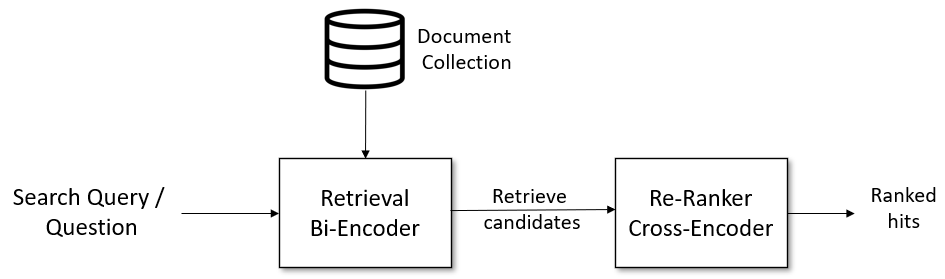